In [56]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [57]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [58]:
df = pd.read_csv("german_credit.csv")
df.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [59]:
df.shape

(1000, 21)

In [60]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [61]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [62]:
x = df[df.columns[1:-1]]
y = df["default"]

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=7)
x_train.head(2)

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone
262,< 0 DM,18,critical account/ other credits existing (not ...,car (new),5302,... < 100 DM,.. >= 7 years,2,male : single,none,4,unknown / no property,36,none,for free,3,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name"
457,< 0 DM,12,existing credits paid back duly till now,car (used),3386,... < 100 DM,.. >= 7 years,3,male : single,none,4,unknown / no property,35,none,for free,1,skilled employee / official,1,"yes, registered under the customers name"


In [64]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [65]:
# Print Shape of model data

In [66]:
df.shape

(1000, 21)

In [67]:
df = pd.get_dummies(df)

In [68]:
df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [69]:
df = pd.get_dummies(df, drop_first = True)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [70]:
x = df[df.columns[1:-1]]
y = df["default"]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [91]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

model.fit(x_train, y_train)
    
predicted = model.predict(x_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [92]:
from sklearn import metrics

print("Confusion Matrix is =", metrics.confusion_matrix(y_test,predicted))

print("Model  Accuracy is = ",metrics.accuracy_score(y_test,predicted))

Confusion Matrix is = [[459  33]
 [134  74]]
Model  Accuracy is =  0.7614285714285715


### Q6 Show the list of the features importance( 1 Marks)

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [94]:
#Select 4 best Features
model1 = SelectKBest(score_func=chi2, k=4)
model1.fit(x, y)

SelectKBest(k=4, score_func=<function chi2 at 0x000000000B4DD2F0>)

In [95]:
#Display the score for each Feature
model1.scores_

array([3.21030795e+02, 5.82624900e+04, 2.20461935e+00, 3.76600552e-03,
       3.02003092e+01, 4.95515619e-01, 1.03071532e-03, 1.04530005e+01,
       4.84504692e+01, 1.81481481e+00, 6.30026589e+01, 1.71904762e+01,
       2.33448724e+01, 1.38528139e-01, 8.98472597e-01, 2.01190476e+01,
       4.66666667e+00, 1.17869416e+00, 7.19251119e+00, 8.93250116e+00,
       8.23129252e+00, 4.24242424e-01, 7.77777778e-01, 3.60168377e-01,
       6.34920635e-02, 1.52910053e+00, 7.00000000e+00, 1.02914791e+01,
       4.44290337e-01, 4.71730915e+00, 1.36458496e+01, 2.66534914e+00,
       9.37320044e+00, 7.43081894e-02, 4.76847291e+00, 1.48694316e+00,
       3.93241167e+00, 2.38095238e+00, 3.49896480e-01, 2.94195342e+00,
       3.77351916e+00, 2.87179487e+00, 5.25017063e-05, 4.02298851e-02,
       8.26161790e-02, 1.02188450e+01, 1.33778602e+01, 8.01952724e+00,
       2.38703639e+00, 2.43262411e+00, 5.93298060e+00, 5.19875776e+00,
       7.06810322e+00, 1.40154440e+00, 6.80272109e-02, 3.46320346e-02,
      

In [96]:
features = model1.transform(x)

In [97]:
normalized_features = (features - features.mean())/features.std()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [99]:
# Use below values
num_folds = 10
seed = 77

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.70, random_state=seed)

kfold = KFold(n_splits=num_folds,shuffle = True)

In [101]:
#Validate the Random Forest model build above using k fold

In [102]:
result = cross_val_score(model, normalized_features, y, cv=kfold)

In [103]:
#Calculate Mean score

In [104]:
result.mean()

0.681

In [105]:
# Calculate score standard deviation using std()

In [106]:
result.std()

0.0472122865364515

# Q8 Print the confusion matrix( 1 Marks)

In [107]:
metrics.confusion_matrix(y_test,predicted)

array([[459,  33],
       [134,  74]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [108]:
from sklearn.metrics import accuracy_score , precision_score
accuracy_score(y_test, predicted)

0.7614285714285715

In [109]:
metrics.precision_score(y_test,predicted)

0.6915887850467289

In [110]:
 metrics.recall_score(y_test, predicted)

0.3557692307692308

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [111]:
#Hint: Use roc_curve

In [113]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.7681363352095059

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [114]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

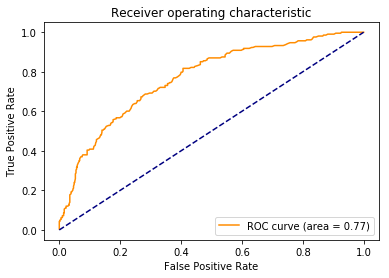

In [115]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")